In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'sans-serif': ['tgpagella'], 'size': 18})
rc('text', usetex=True)

from utils import moving_average

import laserhockey.hockey_env as h_env

In [2]:
def plot_training_episode_return(eval_dicts, labels, colors):
    print('Episode return during training:')
    plt.figure(figsize=(10, 4))
    for i, eval_dict in enumerate(eval_dicts):
        train_rewards = eval_dict['train_rewards']
        w = 400
        plt.plot(
            moving_average(train_rewards, w), 
            label=f'{labels[i]}', 
            linewidth=1.5, 
            color=colors[i]
        )
    plt.xlabel('Episodes')
    plt.ylabel('Return')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [3]:
def plot_evaluation_episode_return(eval_dicts, labels, colors, w=10, mode='valid', eval_freq=5000):
    print('Average episode return in the evaluation during training:')
    plt.figure(figsize=(10, 4))
    for i, eval_dict in enumerate(eval_dicts):
        eval_rewards = eval_dict['eval_rewards']
        eval_mean = np.asarray([np.mean(eval_step) for eval_step in eval_rewards])
        eval_std = np.asarray([np.std(eval_step) for eval_step in eval_rewards])
        t = np.arange(0, eval_freq * len(eval_mean), eval_freq)
        t = t[:-w + 1] if mode == 'valid' else t
        plt.plot(
            t, 
            moving_average(eval_mean, w, mode=mode), 
            label=f'{labels[i]}', 
            linewidth=1.5, 
            color=colors[i]
        )
        plt.fill_between(
            t,
            moving_average(eval_mean + eval_std / 4, w, mode=mode), 
            moving_average(eval_mean - eval_std / 4, w, mode=mode), 
            alpha=0.2,
            color=colors[i]
        )
    plt.xlabel('Time steps')
    plt.ylabel('Average Return')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [4]:
def plot_final_evaluation_return(eval_dicts, labels, colors):
    print('Return in the final evaluation:')
    plt.figure(figsize=(10, 4))
    for i, eval_dict in enumerate(eval_dicts):
        final_eval_rewards = eval_dict['final_eval_rewards']
        if len(final_eval_rewards) == 0:
            final_eval_rewards = eval_dict['eval_rewards'][-1]
        bp = plt.boxplot(
            [final_eval_rewards],
            positions=[i + 1],
            labels=[labels[i]],
            patch_artist=True,
            showmeans=True, 
            meanline=True,
            boxprops=dict(facecolor='white', color=colors[i]),
            capprops=dict(color=colors[i]),
            whiskerprops=dict(color=colors[i]),
            flierprops=dict(markeredgecolor=colors[i], color=colors[i]),
            medianprops=dict(color='black'),
            meanprops=dict(color='grey')
        )
    plt.ylabel('Return')
    plt.legend([bp['medians'][0], bp['means'][0]], ['median', 'mean'])
    plt.show()

In [5]:
def print_win_rates(eval_dicts, labels):
    for i, eval_dict in enumerate(eval_dicts):
        final_eval_results = eval_dict['final_eval_results']
        if len(final_eval_results) == 0:
            final_eval_results = eval_dict['eval_results'][-1]
        num_results = len(final_eval_results)
        final_eval_results = np.asarray(final_eval_results)
        win_rate = np.sum(final_eval_results == 10.0) / num_results
        tie_rate = np.sum(final_eval_results == 0.0) / num_results
        loss_rate = np.sum(final_eval_results == -10.0) / num_results
        print(f'{labels[i]}: ' + 
              f'Win-rate = {win_rate:.2f}, ' + 
              f'Tie-rate = {tie_rate:.2f}, ' + 
              f'Loss-rate = {loss_rate:.2f}')

In [6]:
def plot_all(eval_dicts, labels, colors=['C0', 'C1', 'C3']):
    plot_training_episode_return(eval_dicts, labels, colors)
    plot_evaluation_episode_return(eval_dicts, labels, colors)
    plot_final_evaluation_return(eval_dicts, labels, colors)
    print_win_rates(eval_dicts, labels)

Episode return during training:


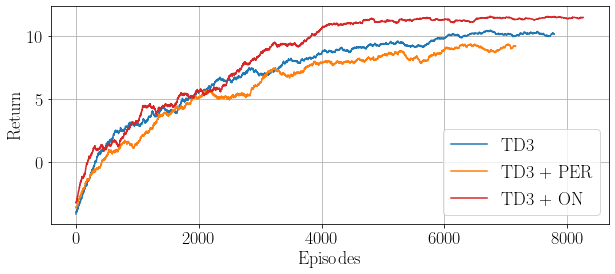

Average episode return in the evaluation during training:


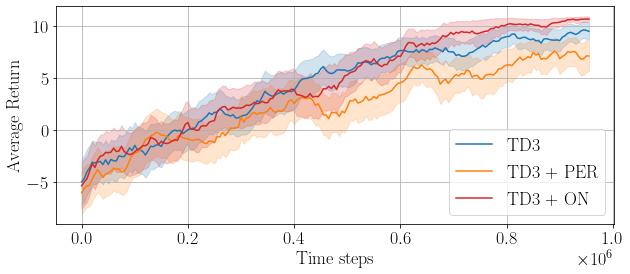

Return in the final evaluation:


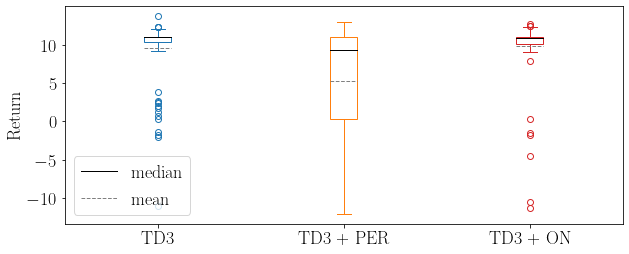

TD3: Win-rate = 0.87, Tie-rate = 0.12, Loss-rate = 0.01
TD3 + PER: Win-rate = 0.54, Tie-rate = 0.41, Loss-rate = 0.05
TD3 + ON: Win-rate = 0.94, Tie-rate = 0.04, Loss-rate = 0.02


In [7]:
# Evaluate all TD3 modifications against the weak and strong opponent
eval_dicts = []
eval_dicts.append(np.load(f'results/TD3_Hockey-v0_NORMAL_baseline.npy', allow_pickle=True).item())
eval_dicts.append(np.load(f'results/TD3_Hockey-v0_NORMAL_baseline+per.npy', allow_pickle=True).item())
eval_dicts.append(np.load(f'results/TD3_Hockey-v0_NORMAL_baseline+obs_norm.npy', allow_pickle=True).item())
labels = ['TD3', 'TD3 + PER', 'TD3 + ON']
plot_all(eval_dicts, labels)

Episode return during training:


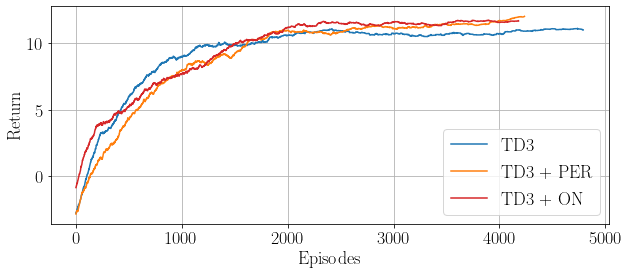

Average episode return in the evaluation during training:


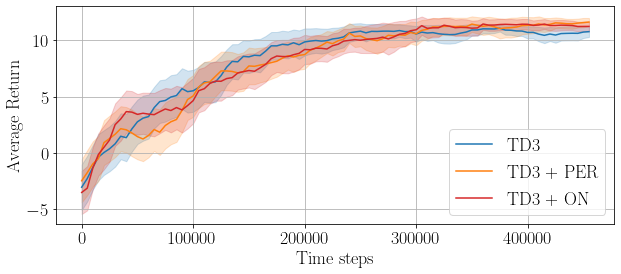

Return in the final evaluation:


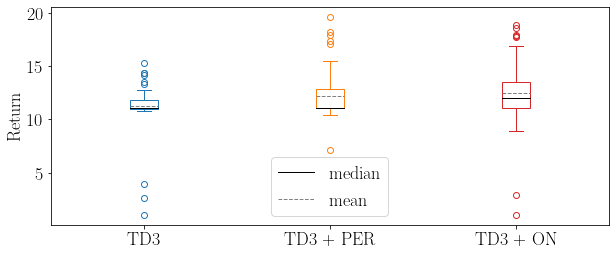

TD3: Win-rate = 0.97, Tie-rate = 0.03, Loss-rate = 0.00
TD3 + PER: Win-rate = 0.99, Tie-rate = 0.01, Loss-rate = 0.00
TD3 + ON: Win-rate = 0.95, Tie-rate = 0.05, Loss-rate = 0.00


In [8]:
# Evaluate all TD3 modifications against the weak opponent
eval_dicts = []
eval_dicts.append(np.load(f'results/TD3_Hockey-v0_NORMAL_baseline_weak.npy', allow_pickle=True).item())
eval_dicts.append(np.load(f'results/TD3_Hockey-v0_NORMAL_baseline_weak+per.npy', allow_pickle=True).item())
eval_dicts.append(np.load(f'results/TD3_Hockey-v0_NORMAL_baseline_weak+obs_norm.npy', allow_pickle=True).item())
labels = ['TD3', 'TD3 + PER', 'TD3 + ON']
plot_all(eval_dicts, labels)

Episode return during training:


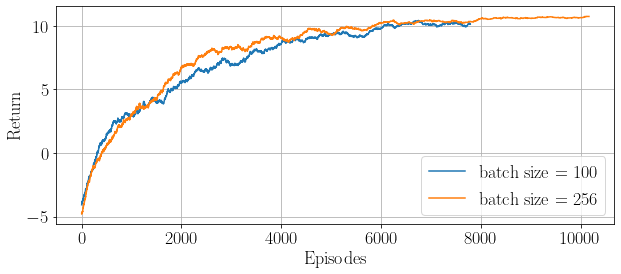

Average episode return in the evaluation during training:


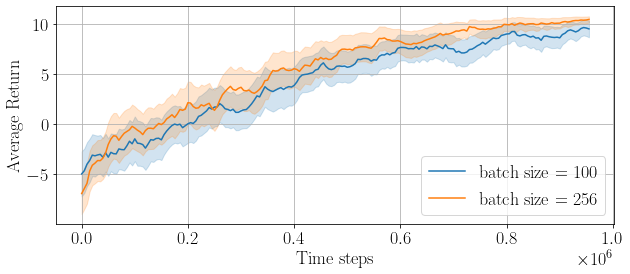

Return in the final evaluation:


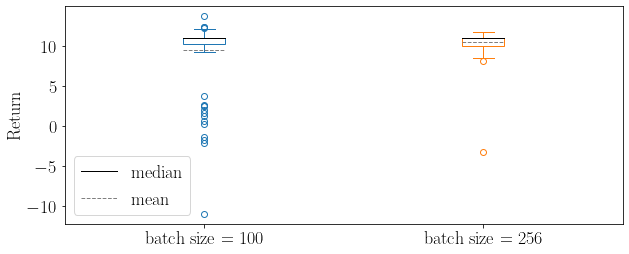

batch size = 100: Win-rate = 0.87, Tie-rate = 0.12, Loss-rate = 0.01
batch size = 256: Win-rate = 0.99, Tie-rate = 0.01, Loss-rate = 0.00


In [9]:
# Evaluate the batch size
eval_dicts = []
eval_dicts.append(np.load(f'results/TD3_Hockey-v0_NORMAL_baseline.npy', allow_pickle=True).item())
eval_dicts.append(np.load(f'results/TD3_Hockey-v0_NORMAL_baseline+batch_size_256.npy', allow_pickle=True).item())
labels = ['batch size = 100', 'batch size = 256']
plot_all(eval_dicts, labels)

Episode return during training:


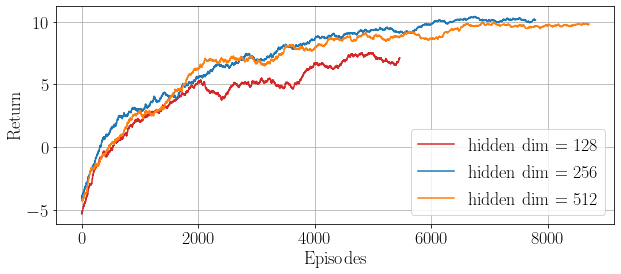

Average episode return in the evaluation during training:


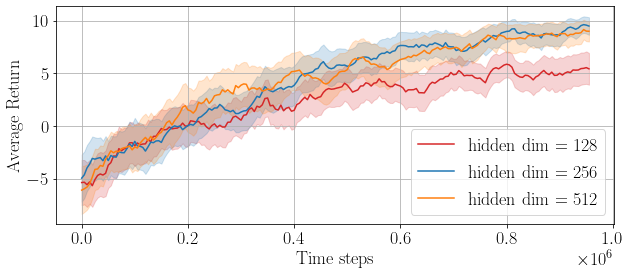

Return in the final evaluation:


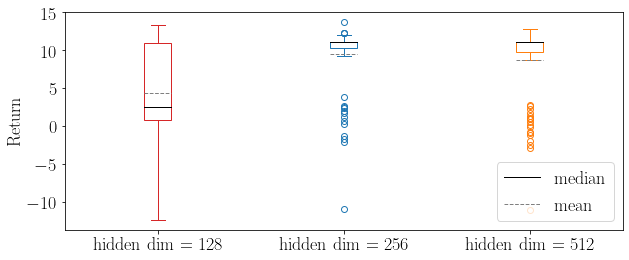

hidden dim = 128: Win-rate = 0.40, Tie-rate = 0.53, Loss-rate = 0.07
hidden dim = 256: Win-rate = 0.87, Tie-rate = 0.12, Loss-rate = 0.01
hidden dim = 512: Win-rate = 0.82, Tie-rate = 0.17, Loss-rate = 0.01


In [10]:
# Evaluate the hidden dim
eval_dicts = []
eval_dicts.append(np.load(f'results/TD3_Hockey-v0_NORMAL_baseline+hidden_dim_128.npy', allow_pickle=True).item())
eval_dicts.append(np.load(f'results/TD3_Hockey-v0_NORMAL_baseline.npy', allow_pickle=True).item())
eval_dicts.append(np.load(f'results/TD3_Hockey-v0_NORMAL_baseline+hidden_dim_512.npy', allow_pickle=True).item())
labels = ['hidden dim = 128', 'hidden dim = 256', 'hidden dim = 512']
plot_all(eval_dicts, labels, colors=['C3', 'C0', 'C1'])

Episode return during training:


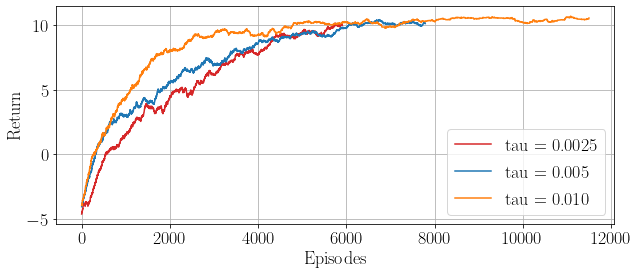

Average episode return in the evaluation during training:


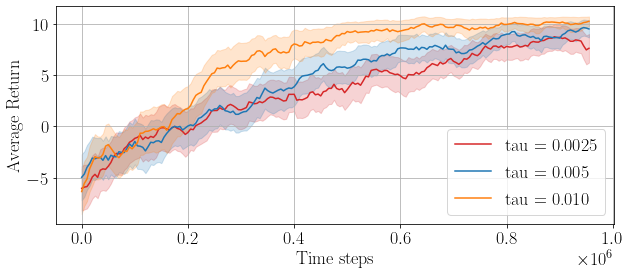

Return in the final evaluation:


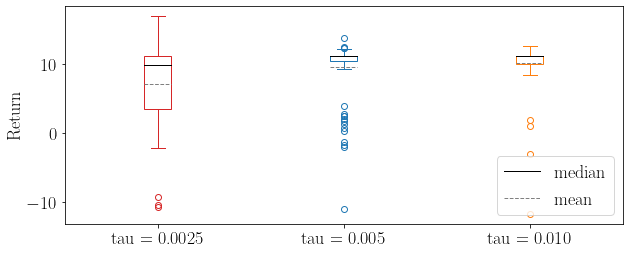

tau = 0.0025: Win-rate = 0.52, Tie-rate = 0.45, Loss-rate = 0.03
tau = 0.005: Win-rate = 0.87, Tie-rate = 0.12, Loss-rate = 0.01
tau = 0.010: Win-rate = 0.96, Tie-rate = 0.03, Loss-rate = 0.01


In [11]:
# Evaluate the target update proportion tau
eval_dicts = []
eval_dicts.append(np.load(f'results/TD3_Hockey-v0_NORMAL_baseline+tau_0_0025.npy', allow_pickle=True).item())
eval_dicts.append(np.load(f'results/TD3_Hockey-v0_NORMAL_baseline.npy', allow_pickle=True).item())
eval_dicts.append(np.load(f'results/TD3_Hockey-v0_NORMAL_baseline+tau_0_0100.npy', allow_pickle=True).item())
labels = ['tau = 0.0025', 'tau = 0.005', 'tau = 0.010']
plot_all(eval_dicts, labels, colors=['C3', 'C0', 'C1'])

Episode return during training:


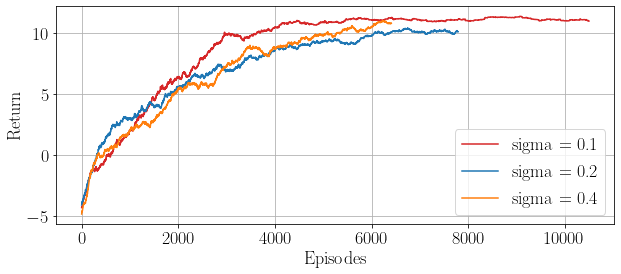

Average episode return in the evaluation during training:


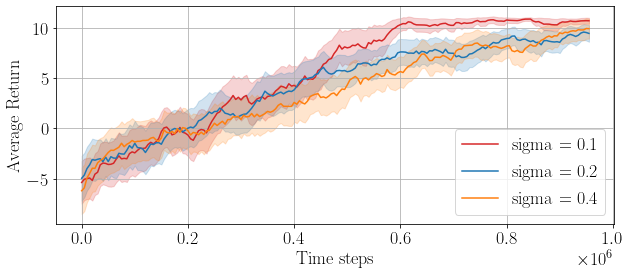

Return in the final evaluation:


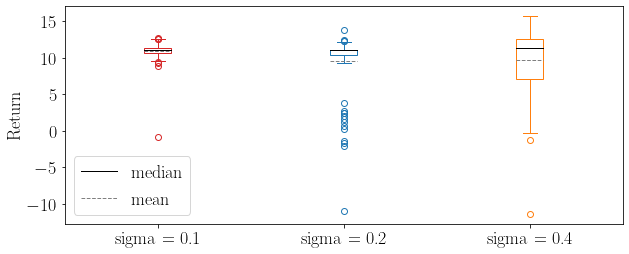

sigma = 0.1: Win-rate = 0.99, Tie-rate = 0.01, Loss-rate = 0.00
sigma = 0.2: Win-rate = 0.87, Tie-rate = 0.12, Loss-rate = 0.01
sigma = 0.4: Win-rate = 0.74, Tie-rate = 0.25, Loss-rate = 0.01


In [12]:
# Evaluate the policy noise sigma_tilde
eval_dicts = []
eval_dicts.append(np.load(f'results/TD3_Hockey-v0_NORMAL_baseline+policy_noise_0_1.npy', allow_pickle=True).item())
eval_dicts.append(np.load(f'results/TD3_Hockey-v0_NORMAL_baseline.npy', allow_pickle=True).item())
eval_dicts.append(np.load(f'results/TD3_Hockey-v0_NORMAL_baseline+policy_noise_0_4.npy', allow_pickle=True).item())
labels = ['sigma = 0.1', 'sigma = 0.2', 'sigma = 0.4']
plot_all(eval_dicts, labels, colors=['C3', 'C0', 'C1'])

Episode return during training:


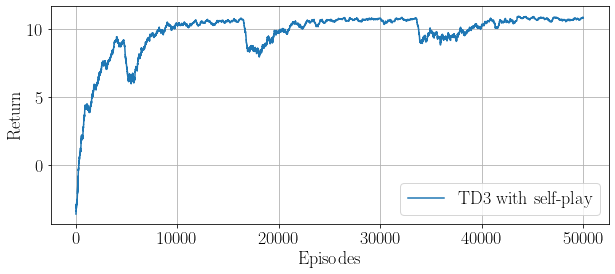

Average episode return in the evaluation during training:


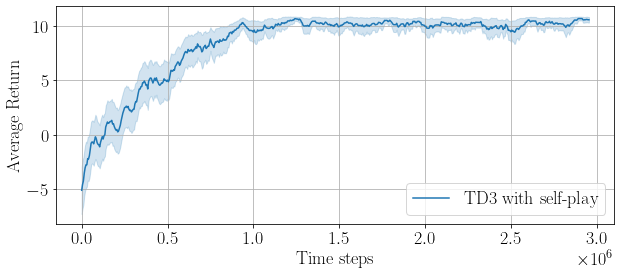

Return in the final evaluation:


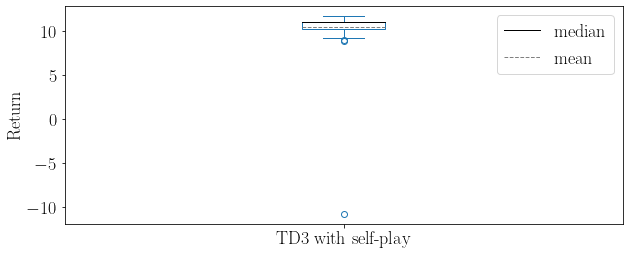

TD3 with self-play: Win-rate = 0.99, Tie-rate = 0.00, Loss-rate = 0.01


In [13]:
# Evaluate TD3 with self-play
eval_dicts = []
eval_dicts.append(np.load(f'results/TD3_Hockey-v0_NORMAL_all_improvements+self_play.npy', allow_pickle=True).item())
labels = ['TD3 with self-play']
plot_all(eval_dicts, labels)